In [1]:
import os
import numpy as np
import mne
import osl
import yaml
import torch
from sklearn.manifold import TSNE
from scipy.io import loadmat, savemat
import pandas as pd
import seaborn as sns
import pickle
from cichy_data import CichyData
import wavenets_classifier
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = [17, 17]

In [4]:
a = torch.zeros(2,3)

In [6]:
a.repeat(4, 1, 1).shape

torch.Size([4, 2, 3])

In [2]:
path = 'cichy_data/subj0/train_data_pca306/'
x_train = []
x_val = []
for i in range(307):
    data = loadmat(path + 'cch' + str(i) + '.mat')
    x_train.append(np.array(data['x_train_t']))
    x_val.append(np.array(data['x_val_t']))

x_train = np.concatenate(tuple(x_val), axis=1)[:, :, :50]
x_val = np.concatenate(tuple(x_val), axis=1)[:, :, :50]

In [12]:
x_val.shape

(590, 307, 50)

In [3]:
# load conv layer
model = torch.load('cichy_data/subj0/simpleclass.pt', map_location=torch.device('cpu'))
conv = model.spatial_conv

In [4]:
# apply conv
x_val_conv = conv(torch.Tensor(x_val[:, :306, :])).detach().numpy()
x_train_conv = conv(torch.Tensor(x_train[:, :306, :])).detach().numpy()
x_val_conv = x_val_conv.reshape(x_val_conv.shape[0], -1)
#x_val_conv = x_val_conv[:, :, 13]
#x_train_conv = x_train_conv[:, :, 13]

In [5]:
# fit pca
x_train_pca = x_train[:, :306, :].transpose(0, 2, 1)
x_train_pca = x_train_pca.reshape(-1, x_train_pca.shape[2])

pca = PCA(80)
pca.fit(x_train_pca)

PCA(n_components=80)

In [6]:
# apply pca
x_val_pca = x_val[:, :306, :].transpose(0, 2, 1)
x_val_pca = x_val_pca.reshape(-1, x_val_pca.shape[2])

x_val_pca = pca.transform(x_val_pca)
x_val_pca = x_val_pca.reshape(x_val.shape[0], -1, x_val_pca.shape[1])
x_val_pca = x_val_pca.reshape(x_val.shape[0], -1)
#x_val_pca = x_val_pca[:, :, 13]

x_train_pca = pca.transform(x_train_pca)
x_train_pca = x_train_pca.reshape(x_train.shape[0], -1, x_train_pca.shape[1])
x_train_pca = x_train_pca.reshape(x_val.shape[0], -1)
#x_train_pca = x_train_pca[:, :, 13]

In [11]:
# compute variance explained
np.sum(pca.explained_variance_ratio_)

0.9622466920220578

In [58]:
# visualize with TSNE
x_val_pca_pca = PCA(2).fit_transform(x_train_pca)
x_val_conv_pca = PCA(2).fit_transform(x_train_conv)

In [31]:
colors = [np.random.rand(3) for _ in range(118)]

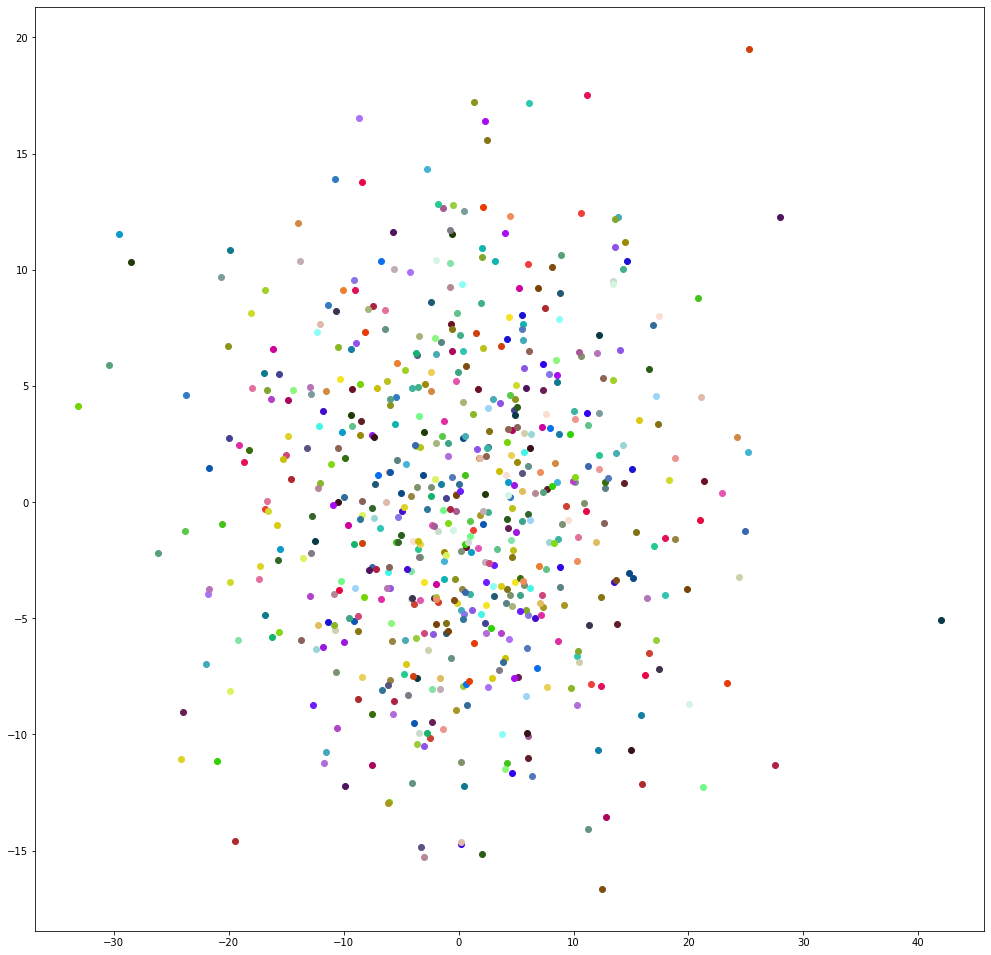

In [59]:
for i, c in enumerate(x_train[:, 306, 0]):
    plt.plot(x_val_pca_pca[i, 0], x_val_pca_pca[i, 1], 'o', color=colors[int(c)])

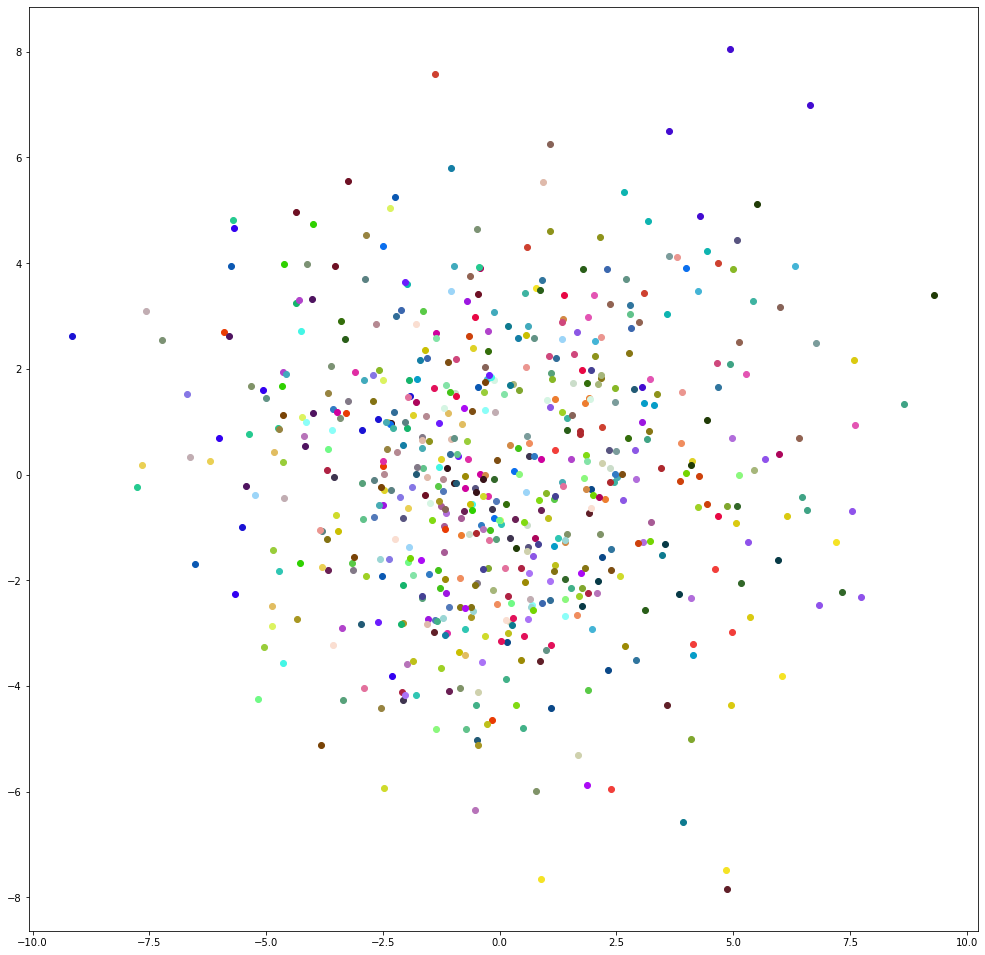

In [60]:
for i, c in enumerate(x_train[:, 306, 0]):
    plt.plot(x_val_conv_pca[i, 0], x_val_conv_pca[i, 1], 'o', color=colors[int(c)])